In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import pickle
from sklearn.impute import SimpleImputer

#### Melakukan read, pengecekan data shape, missing value, nilai unique untuk setiap kolom serta apakah ada data type yang tidak sesuai.

In [2]:
df = pd.read_csv('ObesityDataSet2.csv')
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,24,1.58,65.29,yes,no,2.03,2.74,Sometimes,no,2.00,no,1.28,1.019,no,Public_Transportation,Overweight_Level_II
1,Male,23,1.65,66.00,no,no,3.00,3.00,Sometimes,no,2.00,no,3.00,0.000,no,Public_Transportation,Normal_Weight
2,Female,21,1.69,51.26,yes,yes,3.00,3.18,Frequently,no,1.91,no,0.48,0.625,no,Public_Transportation,Insufficient_Weight
3,Female,22,1.69,65.00,yes,yes,2.00,3.00,Sometimes,no,2.00,no,1.00,1.000,Sometimes,Public_Transportation,Normal_Weight
4,Female,23,1.61,82.64,yes,yes,2.96,1.00,Sometimes,no,2.98,no,0.74,2.000,Sometimes,Public_Transportation,Obesity_Type_I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,Female,21,1.74,130.93,yes,yes,3.00,3.00,Sometimes,no,1.85,no,1.46,0.962,Sometimes,Public_Transportation,Obesity_Type_III
1052,Female,17,1.54,57.26,no,yes,1.97,2.34,Sometimes,no,1.71,yes,0.10,1.191,Sometimes,Public_Transportation,Overweight_Level_I
1053,Female,19,1.60,45.00,no,no,3.00,3.00,no,no,3.00,yes,2.00,0.000,no,Walking,Insufficient_Weight
1054,Female,25,1.69,113.45,yes,yes,3.00,3.00,Sometimes,no,2.99,no,0.39,0.284,Sometimes,Public_Transportation,Obesity_Type_III


In [3]:
df.shape

(1056, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1056 non-null   object 
 1   Age                             1056 non-null   object 
 2   Height                          1056 non-null   float64
 3   Weight                          1056 non-null   float64
 4   family_history_with_overweight  1056 non-null   object 
 5   FAVC                            1056 non-null   object 
 6   FCVC                            1019 non-null   float64
 7   NCP                             1056 non-null   float64
 8   CAEC                            1056 non-null   object 
 9   SMOKE                           1056 non-null   object 
 10  CH2O                            1056 non-null   float64
 11  SCC                             1056 non-null   object 
 12  FAF                             10

In [5]:
for i in df.columns:
    print(f"Value counts untuk {i}:")
    print(df[i].value_counts())
    print()

Value counts untuk Gender:
Gender
Male      532
Female    524
Name: count, dtype: int64

Value counts untuk Age:
Age
21          128
23          118
18          107
26          102
19           79
22           73
20           69
24           42
17           36
25           35
30           29
31           29
38           23
27           21
33           19
34           15
32           14
29           13
16           12
37           11
39           11
28            9
41            9
35            9
40            8
21 years      4
55            3
44            3
36            2
46            2
19 years      2
45            2
23 years      2
22 years      2
42            2
33 years      1
48            1
51            1
43            1
17 years      1
15            1
26 years      1
36 years      1
20 years      1
25 years      1
14            1
Name: count, dtype: int64

Value counts untuk Height:
Height
1.75    63
1.70    62
1.65    51
1.76    50
1.62    44
1.63    43
1.60    41
1.71    3

#### Ditemukan bahwa kolom age ada data yang tidak sesuai, maka data tersebut akan di fill sesuai dengan data aslinya, lalu akan dilakukan perubahan data type.

In [6]:
df['Age'] = df['Age'].str.replace(' years', '')

In [7]:
df['Age'] = df['Age'].astype(int)

In [8]:
for i in df.columns:
    print(f"Value counts untuk {i}:")
    print(df[i].value_counts())
    print()

Value counts untuk Gender:
Gender
Male      532
Female    524
Name: count, dtype: int64

Value counts untuk Age:
Age
21    132
23    120
18    107
26    103
19     81
22     75
20     70
24     42
17     37
25     36
30     29
31     29
38     23
27     21
33     20
34     15
32     14
29     13
16     12
39     11
37     11
41      9
28      9
35      9
40      8
36      3
44      3
55      3
45      2
46      2
42      2
15      1
43      1
51      1
48      1
14      1
Name: count, dtype: int64

Value counts untuk Height:
Height
1.75    63
1.70    62
1.65    51
1.76    50
1.62    44
1.63    43
1.60    41
1.71    38
1.72    36
1.69    35
1.77    34
1.80    33
1.64    33
1.66    33
1.61    32
1.67    31
1.68    30
1.78    28
1.73    26
1.82    26
1.74    25
1.85    24
1.79    24
1.56    18
1.84    17
1.83    17
1.55    17
1.81    16
1.59    15
1.58    14
1.57    14
1.54    12
1.53    11
1.50    10
1.52     8
1.87     8
1.91     8
1.86     6
1.89     5
1.90     4
1.88     4
1.51     3


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1056 non-null   object 
 1   Age                             1056 non-null   int32  
 2   Height                          1056 non-null   float64
 3   Weight                          1056 non-null   float64
 4   family_history_with_overweight  1056 non-null   object 
 5   FAVC                            1056 non-null   object 
 6   FCVC                            1019 non-null   float64
 7   NCP                             1056 non-null   float64
 8   CAEC                            1056 non-null   object 
 9   SMOKE                           1056 non-null   object 
 10  CH2O                            1056 non-null   float64
 11  SCC                             1056 non-null   object 
 12  FAF                             10

#### Kemudian untuk label dari dataset ini, akan saya lakukan ordinal encode, dikarenakan labelnya memiliki urutan hierarki, maka encoding yang akan cocok dilakukan pada data ini adalah ordinal encoding.

In [10]:
a = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III']

df['NObeyesdad'] = df['NObeyesdad'].astype(str)

encode1 = OrdinalEncoder(categories=[a], handle_unknown='use_encoded_value', unknown_value=-1)

df['NObeyesdad'] = encode1.fit_transform(df[['NObeyesdad']])

In [11]:
df['NObeyesdad'].value_counts()

NObeyesdad
4.0    176
6.0    162
5.0    149
3.0    145
2.0    145
1.0    143
0.0    136
Name: count, dtype: int64

#### Selanjutnya akan dilakukan splitting data dengan 80% data train dan 20 % data test.

In [12]:
input=df.drop('NObeyesdad',axis=1)
output=df['NObeyesdad']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(input, output, test_size = 0.2, random_state = 42)

#### Setelah melakukan splitting data, kemudian kita akan melakukan encoding untuk data categorical dan akan dilakukan pengisian missing value pada data yang masih missing.

In [14]:
order = ['no', 'Sometimes', 'Frequently', 'Always']

num_columns = ['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE']
label_columns = ['Gender','family_history_with_overweight','FAVC','SMOKE','SCC']
onehot_columns = ['MTRANS']
ordinal_columns = ['CAEC', 'CALC']

#### Sebelum dilakukan pengisian missing value, saya akan melakukan pengecekan apakah ada outlier untuk data yang akan saya isi.

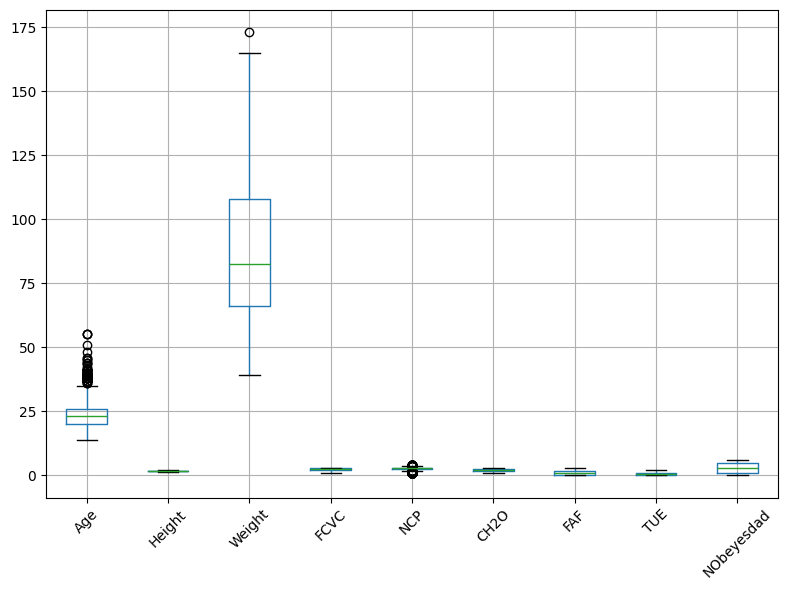

In [15]:
kolom_numerik = [col for col in df.columns if df[col].dtype != 'object']

plt.figure(figsize=(8, 6))
df.boxplot(column=kolom_numerik)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Dikarenakan ada beberapa outlier pada dataset numerik, maka pengisian missing value yang cocok untuk data numerik adalah median, dan data categorical yang missing akan diisi menggunakan modus dari data tersebut.

In [16]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

onehot_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
 ])

ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories=[order, order]))
])

label_transformer = Pipeline(steps=[
    ('label', OrdinalEncoder())
])

In [17]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_columns),
        ('onehot', onehot_transformer, onehot_columns),
        ('ordinal', ordinal_transformer, ordinal_columns),
        ('label', label_transformer, label_columns)
    ]
)

In [18]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Height', 'Weight', 'FCVC', 'NCP',
                                  'CH2O', 'FAF', 'TUE']),
                                ('onehot',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['MTRANS']),
                                ('ordinal',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder(categories=[['no',
                                                                              'Sometimes',
                                                                              'Frequently',
                                                                              'Always'],
                                                                             ['no',
                                                                              'Sometimes',
                                                                              'Frequently',
                                                                              'Always']]))]),
                                 ['CAEC', 'CALC']),
                                ('label',
                                 Pipeline(steps=[('label', OrdinalEncoder())]),
                                 ['Gender', 'family_history_with_overweight',
                                  'FAVC', 'SMOKE', 'SCC'])])

#### Melakukan load dari pipeline yang sudah dibuat, ke model pertama yang saya ingin buat adalah XGBoost.

In [19]:
estimator_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier())
])

estimator_xgb

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Height', 'Weight',
                                                   'FCVC', 'NCP', 'CH2O', 'FAF',
                                                   'TUE']),
                                                 ('onehot',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

#### Kemudian saya juga akan melakukan hyperparameter tuning untuk model ini agar bisa mendapatkan hasil yang terbaik.

In [20]:
param_xgb = {
    'classifier__n_estimators' : [50, 100, 200], 
    'classifier__learning_rate' : [0.1, 0.01, 0.001], 
    'classifier__max_depth' : [2, 4, 6]
}
estimator_xgb = GridSearchCV(estimator_xgb, param_xgb, cv=5)

In [21]:
estimator_xgb.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Height',
                                                                          'Weight',
                                                                          'FCVC',
                                                                          'NCP',
                                                                          'CH2O',
                                                                          'FAF',
                                                                          'TUE']),
                                                                        ('onehot',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder...
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None, ...))]),
             param_grid={'classifier__learning_rate': [0.1, 0.01, 0.001],
                         'classifier__max_depth': [2, 4, 6],
                         'classifier__n_estimators': [50, 100, 200]})

In [22]:
y_pred = estimator_xgb.predict(x_test)

#### Lalu hasil dari model XGBoost akan saya tampilkan menggunakan classification report

In [23]:
print('\nClassification Report\n')
report = classification_report(y_test, y_pred)
print(report)


Classification Report

              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94        27
         1.0       0.87      0.92      0.89        36
         2.0       0.81      0.81      0.81        26
         3.0       0.91      0.91      0.91        23
         4.0       0.94      1.00      0.97        34
         5.0       1.00      0.97      0.99        34
         6.0       1.00      1.00      1.00        32

    accuracy                           0.93       212
   macro avg       0.93      0.93      0.93       212
weighted avg       0.94      0.93      0.93       212



#### Untuk model kedua, model yang saya gunakan adalah model random forest, sama halnya saya akan melakukan modeling dengan pipeline dari preprocessor yang telah saya buat tadi.

In [24]:
estimator_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

estimator_rf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Height', 'Weight',
                                                   'FCVC', 'NCP', 'CH2O', 'FAF',
                                                   'TUE']),
                                                 ('onehot',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown...))]),
                                                  ['MTRANS']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(categories=[['no',
                                                                                               'Sometimes',
                                                                                               'Frequently',
                                                                                               'Always'],
                                                                                              ['no',
                                                                                               'Sometimes',
                                                                                               'Frequently',
                                                                                               'Always']]))]),
                                                  ['CAEC', 'CALC']),
                                                 ('label',
                                                  Pipeline(steps=[('label',
                                                                   OrdinalEncoder())]),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'SMOKE', 'SCC'])])),
                ('classifier', RandomForestClassifier())])

#### Lalu untuk model ini juga tetap akan saya lakukan hyper parameter tuning agar bisa menghasilkan model yang terbaik.

In [25]:
param_rf = {
    'classifier__n_estimators' : [50, 100, 200],
    'classifier__criterion' : ['gini', 'entropy', 'log_loss'], 
    'classifier__max_depth' : [2, 4, 6]
}
estimator_rf = GridSearchCV(estimator_rf, param_rf, cv=5)

In [26]:
estimator_rf.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Height',
                                                                          'Weight',
                                                                          'FCVC',
                                                                          'NCP',
                                                                          'CH2O',
                                                                          'FAF',
                                                                          'TUE']),
                                                                        ('onehot',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder...
                                                                                                                      'Sometimes',
                                                                                                                      'Frequently',
                                                                                                                      'Always']]))]),
                                                                         ['CAEC',
                                                                          'CALC']),
                                                                        ('label',
                                                                         Pipeline(steps=[('label',
                                                                                          OrdinalEncoder())]),
                                                                         ['Gender',
                                                                          'family_history_with_overweight',
                                                                          'FAVC',
                                                                          'SMOKE',
                                                                          'SCC'])])),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__criterion': ['gini', 'entropy',
                                                   'log_loss'],
                         'classifier__max_depth': [2, 4, 6],
                         'classifier__n_estimators': [50, 100, 200]})

In [27]:
y_pred = estimator_rf.predict(x_test)

#### Lalu hasil dari model Random Forest akan saya tampilkan menggunakan classification report

In [28]:
print('\nClassification Report\n')
report = classification_report(y_test, y_pred)
print(report)


Classification Report

              precision    recall  f1-score   support

         0.0       0.88      0.85      0.87        27
         1.0       0.74      0.78      0.76        36
         2.0       0.74      0.77      0.75        26
         3.0       0.78      0.78      0.78        23
         4.0       0.97      0.82      0.89        34
         5.0       0.92      0.97      0.94        34
         6.0       0.97      1.00      0.98        32

    accuracy                           0.86       212
   macro avg       0.86      0.85      0.85       212
weighted avg       0.86      0.86      0.86       212



#### Berdasarkan hasil dari kedua model tersebut, dapat dilihat bahwa XGBoost memiliki hasil yang jauh lebih bagus, maka dari itu model XGBoost akan saya simpan ke dalam bentuk pickle untuk saya laod di backend nantinya.

In [29]:
file_path = 'C:/Users/Wilbert/UAS Model/XGB.pkl'

with open(file_path, 'wb') as file:
    pickle.dump(estimator_xgb, file)